In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn import tree


import pycountry_convert as pc
import holidays
from datetime import date

%matplotlib inline
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [2]:
hotel_data_raw = pd.read_csv('./data/hotel_bookings.csv')
hotel_data_raw.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
# features to be removed: lead_time (since lead time is talking abt the period of time between reservation and checkin), 
#                         arrival_date_year (won't be applicable in the future), company, 
#                         assigned_room_type (should be assigned after arrival)
#                         reservation_status, reservation_status_date (the latest reservation status update time)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300


In [4]:
# Change Data Types From Number to String
hotel_data_raw['is_repeated_guest'] = hotel_data_raw['is_repeated_guest'].astype(str)
hotel_data_raw['agent'] = hotel_data_raw['agent'].astype(str)
hotel_data_raw['is_canceled'] = hotel_data_raw['is_canceled'].astype(str)
hotel_data_raw['arrival_date_month'] = hotel_data_raw['arrival_date_month'].astype(str)
hotel_data_raw['arrival_date_day_of_month'] = hotel_data_raw['arrival_date_day_of_month'].astype(str)
hotel_data_raw['arrival_date_week_number'] = hotel_data_raw['arrival_date_week_number'].astype(str)

In [5]:
# normalization (using minmax)
# • Lead_time
# • Days_in_waiting_list
# • Previous_cancellations
# • Previous_bookings_not_canceled
# • Adr
# • Required_car_parking_spaces
# • Adults
# • Children
# • Babies
# • Stays_in_weekend_nights
# • Stays_in_week_nights
# • Required_car_parking_spaces
# • Booking_changes

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['lead_time']])
hotel_data_raw['lead_time'] = minmax_scaler.transform(hotel_data_raw[['lead_time']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['previous_cancellations']])
hotel_data_raw['previous_cancellations'] = minmax_scaler.transform(hotel_data_raw[['previous_cancellations']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['days_in_waiting_list']])
hotel_data_raw['days_in_waiting_list'] = minmax_scaler.transform(hotel_data_raw[['days_in_waiting_list']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['previous_bookings_not_canceled']])
hotel_data_raw['previous_bookings_not_canceled'] = minmax_scaler.transform(hotel_data_raw[['previous_bookings_not_canceled']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['adr']])
hotel_data_raw['adr'] = minmax_scaler.transform(hotel_data_raw[['adr']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['required_car_parking_spaces']])
hotel_data_raw['required_car_parking_spaces'] = minmax_scaler.transform(hotel_data_raw[['required_car_parking_spaces']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['adults']])
hotel_data_raw['adults'] = minmax_scaler.transform(hotel_data_raw[['adults']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['children']])
hotel_data_raw['children'] = minmax_scaler.transform(hotel_data_raw[['children']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['babies']])
hotel_data_raw['babies'] = minmax_scaler.transform(hotel_data_raw[['babies']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['stays_in_weekend_nights']])
hotel_data_raw['stays_in_weekend_nights'] = minmax_scaler.transform(hotel_data_raw[['stays_in_weekend_nights']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['stays_in_week_nights']])
hotel_data_raw['stays_in_week_nights'] = minmax_scaler.transform(hotel_data_raw[['stays_in_week_nights']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['required_car_parking_spaces']])
hotel_data_raw['required_car_parking_spaces'] = minmax_scaler.transform(hotel_data_raw[['required_car_parking_spaces']])

minmax_scaler = preprocessing.MinMaxScaler().fit(hotel_data_raw[['booking_changes']])
hotel_data_raw['booking_changes'] = minmax_scaler.transform(hotel_data_raw[['booking_changes']])

In [6]:
# One-hot encoding:
# • hotel
# • Arrival_date_month
# • Meal
# • Market_segment
# • Distribution_channel
# • Customer_type
# • Deposit_type
# • country

######
# • Week_of_day
# • Holiday_of_day
# • agent
# 	◦ Binary feature
# • Company
# 	◦ Binary feature

In [7]:
# Handle missing values
# test['Age'].fillna(test['Age'].mean(),inplace = True)
hotel_data_raw['children'].fillna(hotel_data_raw['children'].value_counts().index[0],inplace = True)
hotel_data_raw['country'].fillna(hotel_data_raw['country'].value_counts().index[0],inplace = True)
# do nothing for agent and company as its missing value take meanings

In [8]:
# Add new features
hotel_data_raw['is_company'] = (hotel_data_raw['company'].notnull())
hotel_data_raw['is_agent'] = (hotel_data_raw['agent'].notnull())

hotel_data_raw['is_diff_room_type'] = (hotel_data_raw['reserved_room_type'] != hotel_data_raw['assigned_room_type'])
hotel_data_raw_dates = hotel_data_raw['arrival_date_year'].astype(str) + ' ' + hotel_data_raw['arrival_date_month'].astype(str) + ' ' + hotel_data_raw['arrival_date_day_of_month'].astype(str)
# Portugal plus extended days most people have off
holidays_set = holidays.CountryHoliday('PTE')
hotel_data_raw['arrival_date_day_of_the_week'] = [datetime.datetime.strptime(date, '%Y %B %d').strftime('%A') for date in hotel_data_raw_dates]
hotel_data_raw['is_holiday'] = [datetime.datetime.strptime(date, '%Y %B %d').strftime('%Y-%m-%d') in holidays_set for date in hotel_data_raw_dates]


In [9]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  float64
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  object 
 7   stays_in_weekend_nights         119390 non-null  float64
 8   stays_in_week_nights            119390 non-null  float64
 9   adults                          119390 non-null  float64
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  float64
 12  meal            

In [10]:
hotel_data_raw.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel           0   0.464043               2015               July   
1  Resort Hotel           0   1.000000               2015               July   
2  Resort Hotel           0   0.009498               2015               July   
3  Resort Hotel           0   0.017639               2015               July   
4  Resort Hotel           0   0.018996               2015               July   

  arrival_date_week_number arrival_date_day_of_month  stays_in_weekend_nights  \
0                       27                         1                      0.0   
1                       27                         1                      0.0   
2                       27                         1                      0.0   
3                       27                         1                      0.0   
4                       27                         1                      0.0   

   stays_in_week_nights    adults  children  babies meal country  \
0                  0.00  0.036364       0.0     0.0   BB     PRT   
1                  0.00  0.036364       0.0     0.0   BB     PRT   
2                  0.02  0.018182       0.0     0.0   BB     GBR   
3                  0.02  0.018182       0.0     0.0   BB     GBR   
4                  0.04  0.036364       0.0     0.0   BB     GBR   

  market_segment distribution_channel is_repeated_guest  \
0         Direct               Direct                 0   
1         Direct               Direct                 0   
2         Direct               Direct                 0   
3      Corporate            Corporate                 0   
4      Online TA                TA/TO                 0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                     0.0                             0.0                  C   
1                     0.0                             0.0                  C   
2                     0.0                             0.0                  A   
3                     0.0                             0.0                  A   
4                     0.0                             0.0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C         0.142857   No Deposit    nan      NaN   
1                  C         0.190476   No Deposit    nan      NaN   
2                  C         0.000000   No Deposit    nan      NaN   
3                  A         0.000000   No Deposit  304.0      NaN   
4                  A         0.000000   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type       adr  required_car_parking_spaces  \
0                   0.0     Transient  0.001180                          0.0   
1                   0.0     Transient  0.001180                          0.0   
2                   0.0     Transient  0.015053                          0.0   
3                   0.0     Transient  0.015053                          0.0   
4                   0.0     Transient  0.019307                          0.0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   is_company  is_agent  is_diff_room_type arrival_date_day_of_the_week  \
0       False      True              False                    Wednesday   
1       False      True              False                    Wednesday   
2       False      True               True                    Wednesday   
3       False      True              False                    Wednesday   
4       False      True              False                    Wednesd

In [11]:
le = preprocessing.LabelEncoder()
hotel_data_raw['hotel_encoded'] = le.fit_transform(hotel_data_raw['hotel'])
hotel_data_raw['arrival_date_month_encoded'] = le.fit_transform(hotel_data_raw['arrival_date_month'])
hotel_data_raw['meal_encoded'] = le.fit_transform(hotel_data_raw['meal'])
hotel_data_raw['market_segment_encoded'] = le.fit_transform(hotel_data_raw['market_segment'])
hotel_data_raw['distribution_channel_encoded'] = le.fit_transform(hotel_data_raw['distribution_channel'])
hotel_data_raw['customer_type_encoded'] = le.fit_transform(hotel_data_raw['customer_type'])
hotel_data_raw['deposit_type_encoded'] = le.fit_transform(hotel_data_raw['deposit_type'])
hotel_data_raw['arrival_date_day_of_the_week_encoded'] = le.fit_transform(hotel_data_raw['arrival_date_day_of_the_week'])




hotel_data_raw = pd.get_dummies(hotel_data_raw, columns=[ \
                                                         'hotel', \
                                                         'arrival_date_month', \
                                                         'meal', \
                                                         'market_segment', \
                                                         'distribution_channel', \
                                                         'customer_type', \
                                                         'deposit_type', \
                                                         'arrival_date_day_of_the_week'])

In [12]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 83 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [13]:
hotel_data_raw.head()

is_canceled  lead_time  arrival_date_year arrival_date_week_number  \
0           0   0.464043               2015                       27   
1           0   1.000000               2015                       27   
2           0   0.009498               2015                       27   
3           0   0.017639               2015                       27   
4           0   0.018996               2015                       27   

  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         1                      0.0                  0.00   
1                         1                      0.0                  0.00   
2                         1                      0.0                  0.02   
3                         1                      0.0                  0.02   
4                         1                      0.0                  0.04   

     adults  children  babies country is_repeated_guest  \
0  0.036364       0.0     0.0     PRT                 0   
1  0.036364       0.0     0.0     PRT                 0   
2  0.018182       0.0     0.0     GBR                 0   
3  0.018182       0.0     0.0     GBR                 0   
4  0.036364       0.0     0.0     GBR                 0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                     0.0                             0.0                  C   
1                     0.0                             0.0                  C   
2                     0.0                             0.0                  A   
3                     0.0                             0.0                  A   
4                     0.0                             0.0                  A   

  assigned_room_type  booking_changes  agent  company  days_in_waiting_list  \
0                  C         0.142857    nan      NaN                   0.0   
1                  C         0.190476    nan      NaN                   0.0   
2                  C         0.000000    nan      NaN                   0.0   
3                  A         0.000000  304.0      NaN                   0.0   
4                  A         0.000000  240.0      NaN                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                          0   
1  0.001180                          0.0                          0   
2  0.015053                          0.0                          0   
3  0.015053                          0.0                          0   
4  0.019307                          0.0                          1   

  reservation_status reservation_status_date  is_company  is_agent  \
0          Check-Out              2015-07-01       False      True   
1          Check-Out              2015-07-01       False      True   
2          Check-Out              2015-07-02       False      True   
3          Check-Out              2015-07-02       False      True   
4          Check-Out              2015-07-03       False      True   

   is_diff_room_type  is_holiday  hotel_encoded  arrival_date_month_encoded  \
0              False       False              1                           5   
1              False       False              1                           5   
2               True       False              1                           5   
3              False       False              1                           5   
4              False       False              1                           5   

   meal_encoded  market_segment_encoded  distribution_channel_encoded  \
0             0                       3                             1   
1             0                       3                             1   
2             0                       3                             1   
3             0                       2                             0   
4             0                       6                             3   

   customer_type_encoded  d

In [14]:
hotel_data_raw.corr()

lead_time  arrival_date_year  \
lead_time                                1.000000           0.040142   
arrival_date_year                        0.040142           1.000000   
stays_in_weekend_nights                  0.085671           0.021497   
stays_in_week_nights                     0.165799           0.030883   
adults                                   0.119519           0.029635   
children                                -0.037613           0.054636   
babies                                  -0.020915          -0.013192   
previous_cancellations                   0.086042          -0.119822   
previous_bookings_not_canceled          -0.073548           0.029218   
booking_changes                          0.000149           0.030872   
company                                  0.151464           0.259095   
days_in_waiting_list                     0.170084          -0.056497   
adr                                     -0.063077           0.197580   
required_car_parking_spaces             -0.116451          -0.013684   
total_of_special_requests               -0.095712           0.108531   
is_company                              -0.126280          -0.003020   
is_agent                                      NaN                NaN   
is_diff_room_type                       -0.142220          -0.097402   
is_holiday                               0.000905          -0.000664   
hotel_encoded                           -0.075381          -0.035267   
arrival_date_month_encoded               0.086228          -0.251837   
meal_encoded                             0.000349           0.065840   
market_segment_encoded                   0.013797           0.107697   
distribution_channel_encoded             0.220414           0.022644   
customer_type_encoded                    0.073403          -0.006149   
deposit_type_encoded                     0.375667          -0.064714   
arrival_date_day_of_the_week_encoded    -0.007171           0.019540   
hotel_City Hotel                         0.075381           0.035267   
hotel_Resort Hotel                      -0.075381          -0.035267   
arrival_date_month_April                -0.027514           0.160090   
arrival_date_month_August                0.058121          -0.041982   
arrival_date_month_December             -0.069918          -0.203670   
arrival_date_month_February             -0.141459           0.137434   
arrival_date_month_January              -0.125571           0.150020   
arrival_date_month_July                  0.104140           0.021336   
arrival_date_month_June                  0.072029           0.161462   
arrival_date_month_March                -0.094810           0.148271   
arrival_date_month_May                   0.042237           0.177269   
arrival_date_month_November             -0.063054          -0.173943   
arrival_date_month_October               0.057043          -0.272664   
arrival_date_month_September             0.094956          -0.282448   
meal_BB                                 -0.038259          -0.032865   
meal_FB                                  0.009714          -0.057964   
meal_HB                                  0.136633          -0.057955   
meal_SC                                 -0.097617           0.128706   
meal_Undefined                          -0.015512           0.007213   
market_segment_Aviation                 -0.041554           0.019390   
market_segment_Complementary            -0.067184          -0.010135   
market_segment_Corporate                -0.165075          -0.025186   
market_segment_Direct                   -0.174111           0.013156   
market_segment_Groups                    0.346275          -0.106530   
market_segment_Offline TA/TO             0.146307          -0.123760   
market_segment_Online TA                -0.186304           0.181268   
market_segment_Undefined                -0.003926          -0.006691   
distribution_channel_Corporate          -0.134609          -0.030312   
distribu

In [15]:
continents = []

continent_name_code = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'AQ': 'Antarctica',
    'EU': 'Europe',
    
}

for country in hotel_data_raw["country"]:
    try:
        if country == 'CN':
            country_code == 'CN'
        elif country == 'TMP':
            country_code == 'TL'
        else:
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")

    except:
        print(country,'is not valid')
    
    try:
        #Antarctica
        if country_code == 'AQ':
            continent = 'AQ'
        #United States Minor Outlying Islands
        elif country_code == 'UM':
            continent = 'NA'
        #French Southern and Antarctic Lands
        elif country_code == 'TF':
            continent = 'EU'
        else:
            continent = pc.country_alpha2_to_continent_code(country_code)
    except:
        print(country_code,'is not valid for continent')

        
    continents.append(continent_name_code[continent])
    

hotel_data_raw['continent'] = continents



In [16]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 84 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [17]:
hotel_data_raw['continent_encoded'] = le.fit_transform(hotel_data_raw['continent'])

hotel_data_raw = pd.get_dummies(hotel_data_raw, columns=['continent'])


In [18]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 91 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   is_canceled                             119390 non-null  object 
 1   lead_time                               119390 non-null  float64
 2   arrival_date_year                       119390 non-null  int64  
 3   arrival_date_week_number                119390 non-null  object 
 4   arrival_date_day_of_month               119390 non-null  object 
 5   stays_in_weekend_nights                 119390 non-null  float64
 6   stays_in_week_nights                    119390 non-null  float64
 7   adults                                  119390 non-null  float64
 8   children                                119390 non-null  float64
 9   babies                                  119390 non-null  float64
 10  country                                 1193

In [19]:
hotel_data_raw.to_csv('Hotel_Bookings_Prepared.csv')

In [21]:
# i=1
# fig=plt.figure(figsize=(240,100))
# for col in hotel_data_raw.select_dtypes([np.number]).columns:
#     ax = plt.subplot(7,11,i)
#     ax.set_title(col)
#     i = i+1
#     hotel_data_raw[col].hist()

## Data Visualization

## Data Modeling

### Decision Tree

# **Decision Tree Classifier and Model Evaluation**

In [22]:
# load data
predhotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
pd.options.display.max_rows=1000
pd.options.display.max_columns=300

# one hot encoding
predhotel = pd.get_dummies(predhotel, columns=['arrival_date_week_number','reserved_room_type','assigned_room_type',\
                                               'is_diff_room_type','is_agent','is_company'])

# features to not selected
predhotel = predhotel.drop(['Unnamed: 0','is_repeated_guest','arrival_date_day_of_month','country',\
                            'company','agent','arrival_date_year','reservation_status',\
                            'reservation_status_date','hotel_encoded',\
                            'arrival_date_month_encoded','meal_encoded','market_segment_encoded','distribution_channel_encoded',\
                            'customer_type_encoded','deposit_type_encoded'],axis=1)
# assign features
features = predhotel.columns[1:].tolist()
label = predhotel.columns[:1].tolist()

X = predhotel[features]
y = predhotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)



In [23]:
predhotel.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 119390 entries, 0 to 119389
# Columns: 165 entries, Unnamed: 0 to is_company_True
# dtypes: float64(14), int64(60), object(3), uint8(88)
# memory usage: 80.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 150 entries, is_canceled to is_company_True
dtypes: bool(1), float64(12), int64(57), uint8(80)
memory usage: 72.1 MB


number of nodes of model 1: 19793
Accuracy 0.8248597034927548
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     29989
           1       0.76      0.76      0.76     17767

    accuracy                           0.82     47756
   macro avg       0.81      0.81      0.81     47756
weighted avg       0.82      0.82      0.82     47756

Confusion Matrix 
 [[25807  4182]
 [ 4182 13585]]
ROC-AUC
AUC: 0.8155158936599862


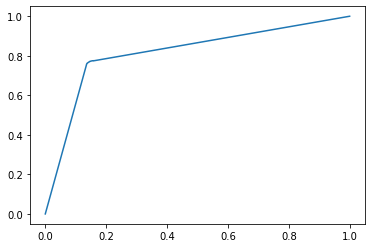

PR-AUC
PR-AUC: 0.8073013783823692


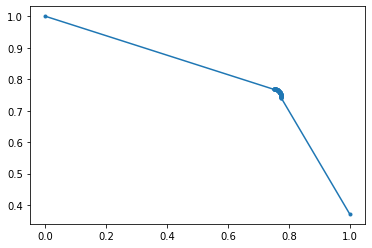

In [24]:
# Model 1 (without pre-setting parameters)
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
treeObj1 = model1.tree_
print("number of nodes of model 1: " + str(treeObj1.node_count))
pred_test1 = model1.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test1,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test1))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test1))

########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model1.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model1.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()


number of nodes of model 2: 169
Accuracy 0.817635480358489
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87     29989
           1       0.86      0.61      0.71     17767

    accuracy                           0.82     47756
   macro avg       0.83      0.78      0.79     47756
weighted avg       0.82      0.82      0.81     47756

Confusion Matrix 
 [[28187  1802]
 [ 6907 10860]]
ROC-AUC
AUC: 0.876656594876143


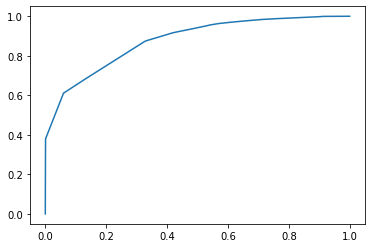

PR-AUC
PR-AUC: 0.8480090533117317


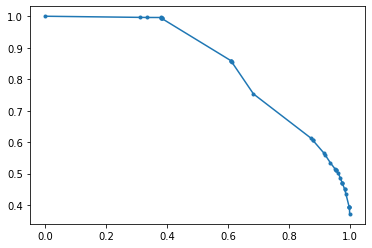

In [25]:
# Model 2
### max depth and leaf nodes generated by GridSearchCV ###
model2 = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=200)
model2.fit(X_train,y_train)
treeObj2 = model2.tree_
print("number of nodes of model 2: " + str(treeObj2.node_count))
pred_test2 = model2.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test2,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test2))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test2))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model2.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model2.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

# **Tree Visualization**

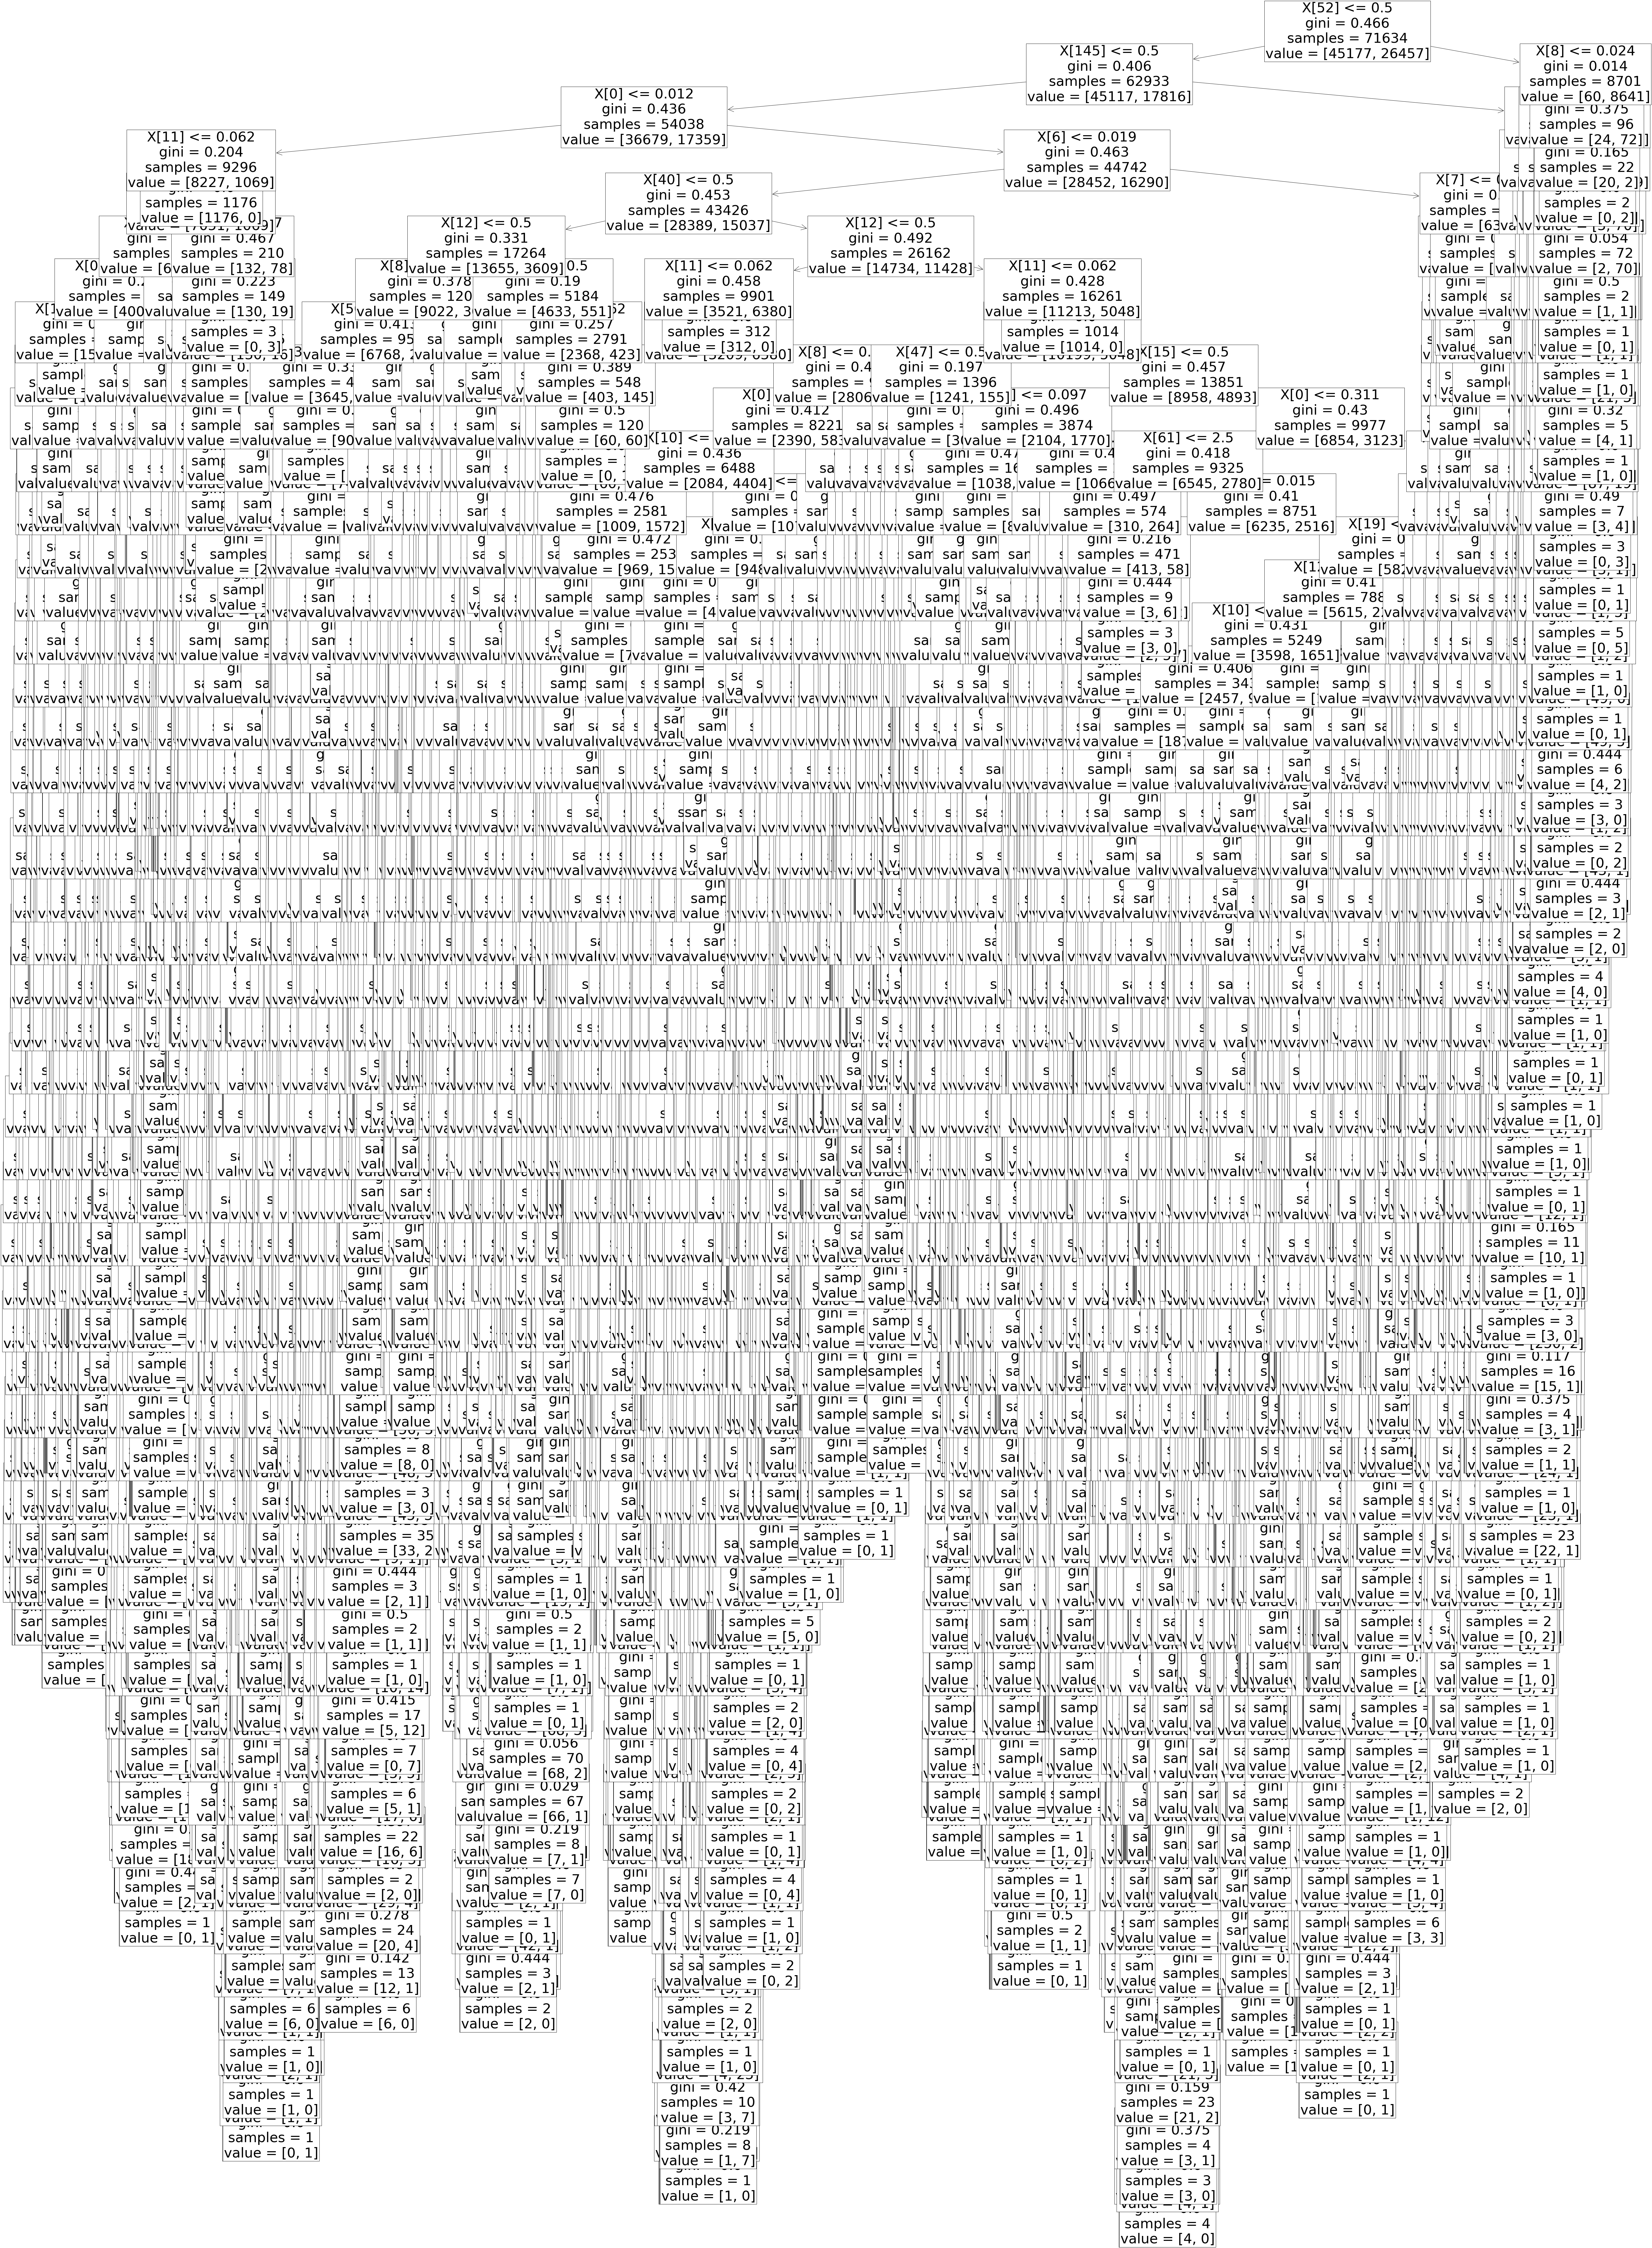

In [26]:
# Visualize tree (before CV)
plt.figure(figsize=(100,150))
tree.plot_tree(model1,ax=None,fontsize=50)
plt.show()

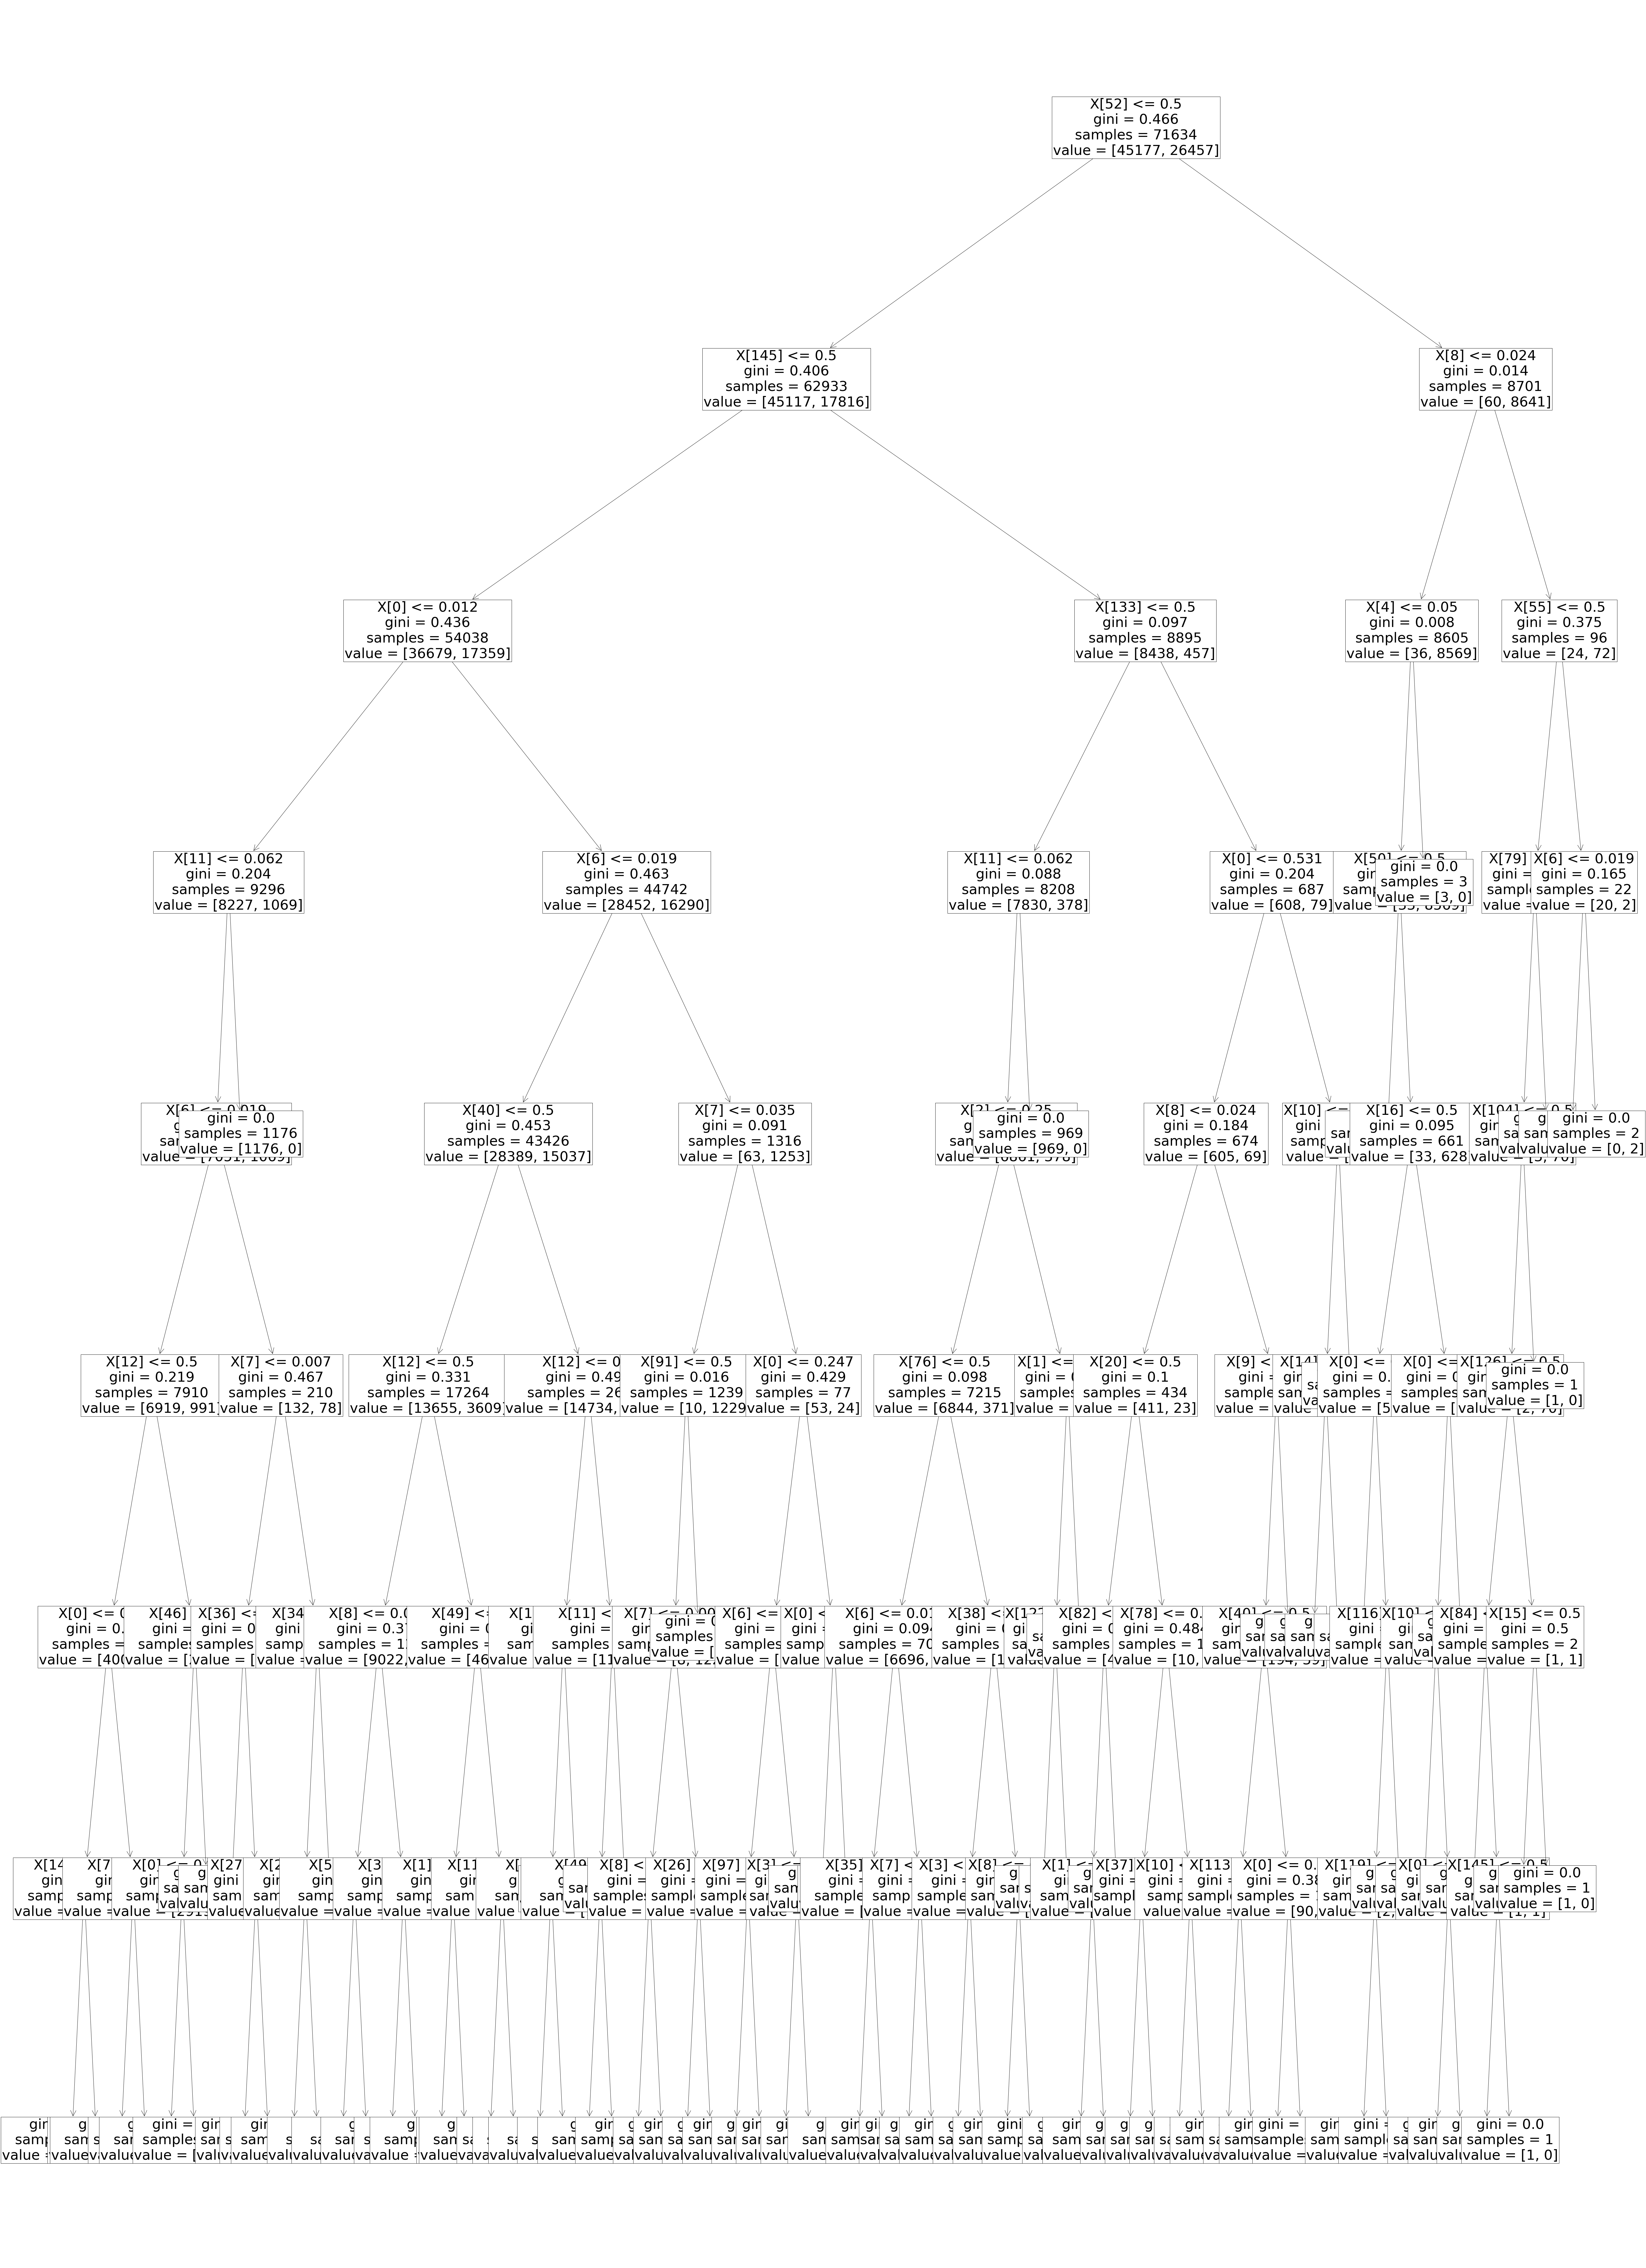

In [27]:
# Visualize tree (after CV)
plt.figure(figsize=(100,150))
tree.plot_tree(model2,ax=None,fontsize=50)
plt.show()

# **GridSearchCV to find best parameter**

In [28]:
# load data
predhotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
pd.options.display.max_rows=1000
pd.options.display.max_columns=300
    
# one hot encoding
predhotel = pd.get_dummies(predhotel, columns=['arrival_date_week_number','reserved_room_type','assigned_room_type',\
                                               'is_diff_room_type','is_agent','is_company'])

# features to not selected
predhotel = predhotel.drop(['Unnamed: 0','is_repeated_guest','arrival_date_day_of_month','country',\
                            'company','agent','arrival_date_year','reservation_status',\
                            'reservation_status_date','hotel_encoded',\
                            'arrival_date_month_encoded','meal_encoded','market_segment_encoded','distribution_channel_encoded',\
                            'customer_type_encoded','deposit_type_encoded'],axis=1)
# assign features
features = predhotel.columns[1:].tolist()
label = predhotel.columns[:1].tolist()

X = predhotel[features]
y = predhotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


model = DecisionTreeClassifier()

# CV
score_cv = cross_val_score(model,X_train,y_train,cv=10)

# Accuracy from cross validation
print('Average accuracy score is ' + str(score_cv.mean()))

# Grid Search CV
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,21)

# Set param_grid
try_grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs}]
print(try_grid)

# Define model with GridSearch CV
DTM = GridSearchCV(DecisionTreeClassifier(),param_grid=try_grid,cv=10,n_jobs=-1)

# Fit mode with training data
DTM.fit(X_train,y_train)

# Find best parameter
print('best parameters: '+str(DTM.best_params_))

# Find accuracy from best parameters
print('best accuracy score: ' + str(DTM.best_score_))

Average accuracy score is 0.8208393403223002
[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]), 'max_leaf_nodes': [5, 10, 50, 100, 200]}]
best parameters: {'max_depth': 20, 'max_leaf_nodes': 200}
best accuracy score: 0.832900606784986


### Logistic Regression

In [72]:
# load dataset
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")

In [73]:
# feature selection
features = ['lead_time',
            'stays_in_weekend_nights',
            'stays_in_week_nights',
            'adults',
            'children',
            'babies',
            'is_repeated_guest',
            'previous_cancellations',
            'previous_bookings_not_canceled',
            'booking_changes',
            'days_in_waiting_list',
            'adr',
            'required_car_parking_spaces',
            'total_of_special_requests',
            'is_company',
            'is_agent',
            'is_diff_room_type',
            'is_holiday',
            'hotel_City Hotel',
            'hotel_Resort Hotel',
            'arrival_date_month_April',
            'arrival_date_month_August',
            'arrival_date_month_December',
            'arrival_date_month_February',
            'arrival_date_month_January',
            'arrival_date_month_July',
            'arrival_date_month_June',
            'arrival_date_month_March',
            'arrival_date_month_May',
            'arrival_date_month_November',
            'arrival_date_month_October',
            'arrival_date_month_September',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'deposit_type_Refundable',
            'arrival_date_day_of_the_week_Friday',
            'arrival_date_day_of_the_week_Monday',
            'arrival_date_day_of_the_week_Saturday',
            'arrival_date_day_of_the_week_Sunday',
            'arrival_date_day_of_the_week_Thursday',
            'arrival_date_day_of_the_week_Tuesday',
            'arrival_date_day_of_the_week_Wednesday',
            'continent_Africa',
            'continent_Antarctica',
            'continent_Asia',
            'continent_Australia',
            'continent_Europe',
            'continent_North America',
            'continent_South America']

In [74]:
# define model features and label
X = data[features]
# change target column to array
y = data['is_canceled'].values.ravel()

In [75]:
# Split data - 40% for testing, 60% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [77]:
# Run trial - use model (LRM_trial) with default parameters
LRM_trial = LogisticRegression()
LRM_trial.fit(X_train,y_train)

# LRM_trial - show top 15 coefficient of the features in descending order of absolute value 
LRM_trial_coefficient = pd.DataFrame(LRM_trial.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM_trial_coefficient.iloc[LRM_trial_coefficient['Coefficient'].abs().argsort()][::-1].head(15) 

# LRM_trial - predict labels in testing set
LRM_trial_y_pred = LRM_trial.predict(X_test) # LRM_trial_y_pred = predicted labels from testing set features (X_test)

# LRM_trial - predict probability in testing set
LRM_trial_y_pred_prob = LRM_trial.predict_proba(X_test) ## LRM_trial_y_pred_prob = the probabilistic predictions

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
# Performance of LRM_trial
print('Performance of model - LRM_trial')
print()
print("Accuracy: \n",accuracy_score(y_test,LRM_trial_y_pred,normalize=True,sample_weight=None))
print()
print("Classification Report: \n",classification_report(y_test,LRM_trial_y_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,LRM_trial_y_pred))
print()
precision, recall, _ = precision_recall_curve(y_test, LRM_trial_y_pred_prob[:,0])
print("PR-AUC: \n",auc(recall, precision))
print()
fpr, tpr, thresholds = metrics.roc_curve(y_test,LRM_trial_y_pred_prob[:,0],pos_label=0)
print('ROC-AUC: \n',metrics.auc(fpr, tpr))
print()

Performance of model - LRM_trial

Accuracy: 
 0.8045062400536058

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     30163
           1       0.82      0.61      0.70     17593

    accuracy                           0.80     47756
   macro avg       0.81      0.76      0.78     47756
weighted avg       0.81      0.80      0.80     47756


Confusion Matrix: 
 [[27769  2394]
 [ 6942 10651]]

PR-AUC: 
 0.22605395858087424

ROC-AUC: 
 0.858944430122698



In [81]:
# Tuning Parameters with GridSearchCV()
try_grid = {
            'penalty':['l1', 'l2', 'elasticnet'],
            'dual':[False],
            'tol':[1e-4],
            'C':[0.8,1.0,1.2,1.4,1.6,2.0],
            'fit_intercept':[True],
            'intercept_scaling':[1],
            'class_weight':[None],
            'random_state':[None],
            'solver':['saga'],
            'max_iter':[4000],
            'multi_class':['ovr'],
            'verbose':[0],
            'warm_start':[False],
            'l1_ratio':[0.5]
           }
LRM = GridSearchCV(LogisticRegression(), param_grid=try_grid, cv=10,n_jobs=-1 )

In [83]:
# Fit to training dataset
LRM.fit(X_train,y_train)
# Check the best score and the best parameters
print(LRM.best_score_)
print(LRM.best_params_)

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


0.81433376415638
{'C': 2.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 4000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [84]:
# See the best score and the best parameters
print(LRM.best_score_)
print(LRM.best_params_)

0.81433376415638
{'C': 2.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 4000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [85]:
# Define the model with the best parameters obtained
# 'C': 2.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 4000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False
LRM = LogisticRegression(C=2.0,
                         class_weight=None, 
                         dual=False,
                         fit_intercept=True,
                         intercept_scaling=1,
                         l1_ratio=0.5,
                         max_iter=4000,
                         multi_class='ovr',
                         penalty='l1',
                         random_state=None,
                         solver='saga', 
                         tol=0.0001,
                         verbose=0,
                         warm_start=False)

In [86]:
# Get average acuracy rate of the model performacne on traingin dataset
score_cv = cross_val_score(LRM, X_train, y_train, cv=10)
score_cv.mean()

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio para

0.81433376415638

In [87]:
# LRM - fit model
LRM.fit(X_train,y_train)

# LRM - show top 15 coefficient of the features in descending order of absolute value 
LRM_coefficient = pd.DataFrame(LRM.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
LRM_coefficient.iloc[LRM_coefficient['Coefficient'].abs().argsort()][::-1].head(15)

# LRM - predict labels in testing set
y_pred = LRM.predict(X_test) # y_pred = predicted labels from testing set features (X_test)

# LRM - predict probability in testing set
y_pred_prob = LRM.predict_proba(X_test) # y_pred_prob = the probabilistic predictions

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


In [88]:
# LRM - show coefficient of the features
LRM_coefficient = pd.DataFrame(LRM.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
#LRM_coefficient.loc[LRM1_coefficient['Coefficient'] != 0]
LRM_coefficient.iloc[LRM_coefficient['Coefficient'].abs().argsort()][::-1].head(15)

Coefficient
previous_cancellations            72.646378
required_car_parking_spaces      -48.874254
previous_bookings_not_canceled   -35.192217
adr                               23.355486
booking_changes                   -7.759143
deposit_type_Non Refund            4.898587
adults                             4.009561
lead_time                          2.880454
stays_in_week_nights               2.184284
is_diff_room_type                 -1.796560
is_company                        -0.963124
distribution_channel_GDS          -0.922947
children                           0.827472
total_of_special_requests         -0.714465
babies                             0.679190

In [89]:
# Performance of LRM
print('Performance of model - LRM')
print()
print("Accuracy: \n",accuracy_score(y_test,y_pred,normalize=True,sample_weight=None))
print()
print("Classification Report: \n",classification_report(y_test,y_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print()
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:,0])
print("PR-AUC: \n",auc(recall, precision))
print()
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob[:,0],pos_label=0)
print('ROC-AUC: \n',metrics.auc(fpr, tpr))
print('----------------------------------------------------------------------')

# Performance of LRM_trial
print('Performance of model - LRM_trial')
print()
print("Accuracy: \n",accuracy_score(y_test,LRM_trial_y_pred,normalize=True,sample_weight=None))
print()
print("Classification Report: \n",classification_report(y_test,LRM_trial_y_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,LRM_trial_y_pred))
print()
precision_trial, recall_trial, _trial = precision_recall_curve(y_test, LRM_trial_y_pred_prob[:,0])
print("PR-AUC: \n",auc(recall_trial, precision_trial))
print()
fpr_trial, tpr_trial, thresholds_trial = metrics.roc_curve(y_test,LRM_trial_y_pred_prob[:,0],pos_label=0)
print('ROC-AUC: \n',metrics.auc(fpr_trial, tpr_trial))
print('----------------------------------------------------------------------')


# Introduce majority classifier as the benchmark model
pred_val_maj = np.zeros(y_test.shape, dtype = int)

# Evaluation Tools Majority Classifier
print('Performance of majority classifier')
print()
print("Accuracy: \n",accuracy_score(y_test,pred_val_maj,normalize=True,sample_weight=None))
print()
print("Classification Report: \n",classification_report(y_test,pred_val_maj))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,pred_val_maj))

Performance of model - LRM

Accuracy: 
 0.8166094312756512

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     30163
           1       0.83      0.63      0.72     17593

    accuracy                           0.82     47756
   macro avg       0.82      0.78      0.79     47756
weighted avg       0.82      0.82      0.81     47756


Confusion Matrix: 
 [[27866  2297]
 [ 6461 11132]]

PR-AUC: 
 0.2245094313187743

ROC-AUC: 
 0.8681964590282113
----------------------------------------------------------------------
Performance of model - LRM_trial

Accuracy: 
 0.8045062400536058

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     30163
           1       0.82      0.61      0.70     17593

    accuracy                           0.80     47756
   macro avg       0.81      0.76      0.78     47756
weighted avg       0.81      0.80      0.

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


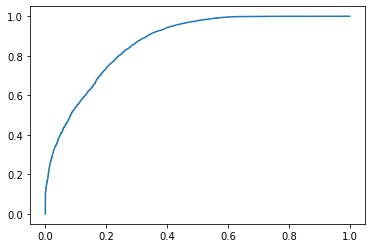

In [90]:
# ROC of the best model (LRM)
plt.plot(fpr,tpr)

### Naive Bayes

In [1]:
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")
data['reservation_status'].hist()

NameError: name 'pd' is not defined

In [71]:
# load data
data = pd.read_csv('Hotel_Bookings_Prepared.csv')

# assign features
features = ['lead_time', \
 'stays_in_weekend_nights', \
 'stays_in_week_nights', \
 'adults', \
 'children', \
 'babies', \
 'previous_cancellations', \
 'previous_bookings_not_canceled', \
 'booking_changes', \
 'days_in_waiting_list', \
 'adr', \
 'required_car_parking_spaces', \
 'total_of_special_requests', \
 'is_company', \
 'is_agent', \
 'is_holiday', \
 'is_diff_room_type', \
 'hotel_encoded', \
 'arrival_date_month_encoded', \
 'meal_encoded', \
 'market_segment_encoded', \
 'distribution_channel_encoded', \
 'customer_type_encoded', \
 'deposit_type_encoded', \
 'hotel_City Hotel', \
 'hotel_Resort Hotel', \
 'continent_encoded',\
 'arrival_date_day_of_the_week_encoded']

# define model features and label
X = data[features]
y = data['is_canceled'].values.ravel()

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [45]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

score = cross_val_score(mnb,X,y,cv=3)
score.mean()

mnb.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
pred_y = cross_val_predict(mnb,X_train,y_train,cv=10)
pred_proba = cross_val_predict(mnb, X_train,y_train,cv=10, method = 'predict_proba')

ROC-AUC
AUC: 0.7915707133081307


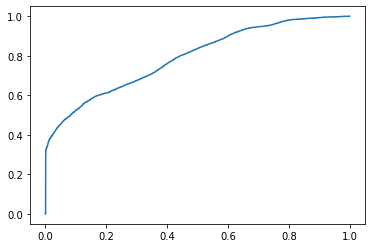

PR-AUC
PR-AUC: 0.7519494699550293


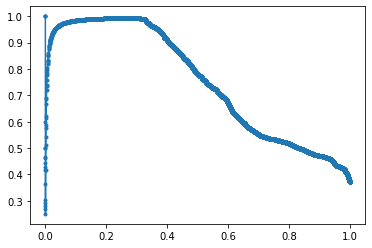

In [70]:
y_pred_prob = mnb.predict_proba(X_test)

########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = mnb.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
print('AUC: '+ str(auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
precision, recall, _ = precision_recall_curve(y_test,y_pred_prob[:,1])
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

### Random Forest

# **Decision Tree**

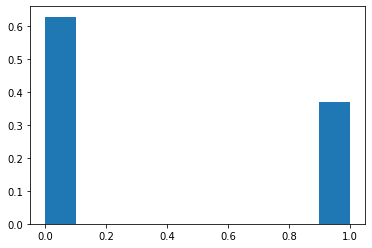

In [91]:
hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
hotel.head()

canceled = list(hotel.is_canceled)
plt.hist(canceled, weights=np.ones(len(canceled)) / len(canceled))
plt.show()

In [92]:
hotel.head()

Unnamed: 0  is_canceled  lead_time  arrival_date_year  \
0           0            0   0.464043               2015   
1           1            0   1.000000               2015   
2           2            0   0.009498               2015   
3           3            0   0.017639               2015   
4           4            0   0.018996               2015   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   

  country  is_repeated_guest  previous_cancellations  \
0     PRT                  0                     0.0   
1     PRT                  0                     0.0   
2     GBR                  0                     0.0   
3     GBR                  0                     0.0   
4     GBR                  0                     0.0   

   previous_bookings_not_canceled reserved_room_type assigned_room_type  \
0                             0.0                  C                  C   
1                             0.0                  C                  C   
2                             0.0                  A                  C   
3                             0.0                  A                  A   
4                             0.0                  A                  A   

   booking_changes  agent  company  days_in_waiting_list       adr  \
0         0.142857    NaN      NaN                   0.0  0.001180   
1         0.190476    NaN      NaN                   0.0  0.001180   
2         0.000000    NaN      NaN                   0.0  0.015053   
3         0.000000  304.0      NaN                   0.0  0.015053   
4         0.000000  240.0      NaN                   0.0  0.019307   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                          0.0                          0          Check-Out   
1                          0.0                          0          Check-Out   
2                          0.0                          0          Check-Out   
3                          0.0                          0          Check-Out   
4                          0.0                          1          Check-Out   

  reservation_status_date  is_company  is_agent  is_diff_room_type  \
0              2015-07-01       False      True              False   
1              2015-07-01       False      True              False   
2              2015-07-02       False      True               True   
3              2015-07-02       False      True              False   
4              2015-07-03       False      True              False   

   is_holiday  hotel_encoded  arrival_date_month_encoded  meal_encoded  \
0       False              1                           5             0   
1       False              1                           5             0   
2       False              1                           5             0   
3       False              1                           5             0   
4       False              1                           5             0   

   market_segment_encoded  distribution_channel_encoded  \
0                       3                             1   
1                       3                             1   
2                       3                             1   
3                   

In [93]:
# one hot encoding
hotel = pd.get_dummies(hotel, columns=['is_holiday','is_diff_room_type','is_agent','is_company'])

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 95 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              119390 non-null  int64  
 1   is_canceled                             119390 non-null  int64  
 2   lead_time                               119390 non-null  float64
 3   arrival_date_year                       119390 non-null  int64  
 4   arrival_date_week_number                119390 non-null  int64  
 5   arrival_date_day_of_month               119390 non-null  int64  
 6   stays_in_weekend_nights                 119390 non-null  float64
 7   stays_in_week_nights                    119390 non-null  float64
 8   adults                                  119390 non-null  float64
 9   children                                119390 non-null  float64
 10  babies                                  1193

In [94]:
hotel = hotel.drop(['Unnamed: 0','arrival_date_year','arrival_date_day_of_month',\
                    'country', 'agent', 'company', 'reservation_status', 'reservation_status_date', 'hotel_encoded',\
                    'arrival_date_month_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded',\
                    'continent_encoded','arrival_date_day_of_the_week_encoded','arrival_date_week_number',\
                    'deposit_type_encoded','customer_type_encoded','reserved_room_type','assigned_room_type',\
                    'continent_Australia','deposit_type_Refundable','customer_type_Group','market_segment_Complementary',\
                    'distribution_channel_GDS','market_segment_Aviation','distribution_channel_Undefined',\
                    'market_segment_Undefined','continent_Antarctica','is_agent_True','is_diff_room_type_False',\
                    'is_holiday_False','is_company_False']
                    ,axis=1)

# assign features
features = hotel.columns[1:].tolist()
label = hotel.columns[:1].tolist()

X = hotel[features]
y = hotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [95]:
hotel.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0            0   0.464043                      0.0                  0.00   
1            0   1.000000                      0.0                  0.00   
2            0   0.009498                      0.0                  0.02   
3            0   0.017639                      0.0                  0.02   
4            0   0.018996                      0.0                  0.04   

     adults  children  babies  is_repeated_guest  previous_cancellations  \
0  0.036364       0.0     0.0                  0                     0.0   
1  0.036364       0.0     0.0                  0                     0.0   
2  0.018182       0.0     0.0                  0                     0.0   
3  0.018182       0.0     0.0                  0                     0.0   
4  0.036364       0.0     0.0                  0                     0.0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                             0.0         0.142857                   0.0   
1                             0.0         0.190476                   0.0   
2                             0.0         0.000000                   0.0   
3                             0.0         0.000000                   0.0   
4                             0.0         0.000000                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                          0   
1  0.001180                          0.0                          0   
2  0.015053                          0.0                          0   
3  0.015053                          0.0                          0   
4  0.019307                          0.0                          1   

   hotel_City Hotel  hotel_Resort Hotel  arrival_date_month_April  \
0                 0                   1                         0   
1                 0                   1                         0   
2                 0                   1                         0   
3                 0                   1                         0   
4                 0                   1                         0   

   arrival_date_month_August  arrival_date_month_December  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   arrival_date_month_February  arrival_date_month_January  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   arrival_date_month_July  arrival_date_month_June  arrival_date_month_March  \
0                        1                        0                         0   
1                        1                        0                         0   
2                        1                        0                         0   
3                        1                        0                         0   
4                        1                        0                         0   

   arrival_date_month_May  arrival_date_month_November  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   arrival_date_month_October  arrival_date_month_September  meal_BB  meal_FB  \
0                           0                             0        1        0   
1                           0                       

In [96]:
hotel.corr()

is_canceled  lead_time  \
is_canceled                                1.000000   0.293123   
lead_time                                  0.293123   1.000000   
stays_in_weekend_nights                   -0.001791   0.085671   
stays_in_week_nights                       0.024765   0.165799   
adults                                     0.060017   0.119519   
children                                   0.005036  -0.037613   
babies                                    -0.032491  -0.020915   
is_repeated_guest                         -0.084793  -0.124410   
previous_cancellations                     0.110133   0.086042   
previous_bookings_not_canceled            -0.057358  -0.073548   
booking_changes                           -0.144381   0.000149   
days_in_waiting_list                       0.054186   0.170084   
adr                                        0.047557  -0.063077   
required_car_parking_spaces               -0.195498  -0.116451   
total_of_special_requests                 -0.234658  -0.095712   
hotel_City Hotel                           0.136531   0.075381   
hotel_Resort Hotel                        -0.136531  -0.075381   
arrival_date_month_April                   0.024885  -0.027514   
arrival_date_month_August                  0.005343   0.058121   
arrival_date_month_December               -0.010524  -0.069918   
arrival_date_month_February               -0.020212  -0.141459   
arrival_date_month_January                -0.031073  -0.125571   
arrival_date_month_July                    0.002938   0.104140   
arrival_date_month_June                    0.029039   0.072029   
arrival_date_month_March                  -0.030266  -0.094810   
arrival_date_month_May                     0.017989   0.042237   
arrival_date_month_November               -0.029544  -0.063054   
arrival_date_month_October                 0.006682   0.057043   
arrival_date_month_September               0.013693   0.094956   
meal_BB                                    0.013124  -0.038259   
meal_FB                                    0.038828   0.009714   
meal_HB                                   -0.019845   0.136633   
meal_SC                                    0.001282  -0.097617   
meal_Undefined                            -0.025896  -0.015512   
market_segment_Corporate                  -0.081667  -0.165075   
market_segment_Direct                     -0.154390  -0.174111   
market_segment_Groups                      0.221859   0.346275   
market_segment_Offline TA/TO              -0.028472   0.146307   
market_segment_Online TA                  -0.006288  -0.186304   
distribution_channel_Corporate            -0.075428  -0.134609   
distribution_channel_Direct               -0.151620  -0.161594   
distribution_channel_TA/TO                 0.175944   0.221734   
customer_type_Contract                    -0.023670   0.068541   
customer_type_Transient                    0.133084  -0.173959   
customer_type_Transient-Party             -0.124135   0.159548   
deposit_type_No Deposit                   -0.477911  -0.380233   
deposit_type_Non Refund                    0.481457   0.380179   
arrival_date_day_of_the_week_Friday        0.033053   0.010878   
arrival_date_day_of_the_week_Monday       -0.025872  -0.027052   
arrival_date_day_of_the_week_Saturday      0.021356   0.016487   
arrival_date_day_of_the_week_Sunday       -0.036181  -0.059170   
arrival_date_day_of_the_week_Thursday      0.037492   0.123286   
arrival_date_day_of_the_week_Tuesday      -0.031563  -0.056259   
arrival_date_day_of_the_week_Wednesday    -0.007464  -0.024403   
continent_Africa                           0.011326  -0.053859   
continent_Asia                             0.003119  -0.069917   
continent_Europe                           0.022541   0.094008   
continent_North America                   -0.040441  -0.035932   
continent_South America                   -0.006077  -0.035104   
is_holiday_True                            0.014578   0.000905   
is_diff_room_t

number of nodes of model 1: 21127
Accuracy 0.8229123042130831
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     29989
           1       0.76      0.77      0.76     17767

    accuracy                           0.82     47756
   macro avg       0.81      0.81      0.81     47756
weighted avg       0.82      0.82      0.82     47756

Confusion Matrix 
 [[25700  4289]
 [ 4168 13599]]
ROC-AUC
AUC: 0.8140480077305994


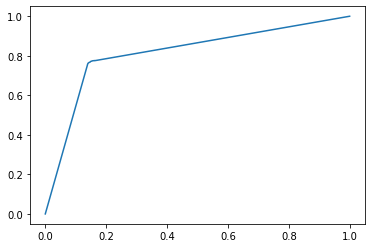

PR-AUC
PR-AUC: 0.8052444936782202


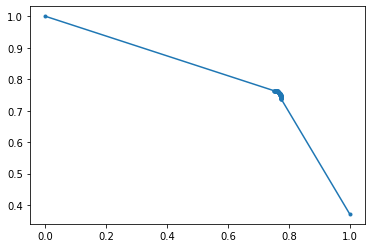

In [97]:
# Model 1 (without pre-setting parameters)
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
treeObj1 = model1.tree_
print("number of nodes of model 1: " + str(treeObj1.node_count))
pred_test1 = model1.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test1,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test1))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test1))

########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model1.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model1.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

number of nodes of model 2: 399
Accuracy 0.8331518552642599
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.87     29989
           1       0.84      0.68      0.75     17767

    accuracy                           0.83     47756
   macro avg       0.84      0.80      0.81     47756
weighted avg       0.83      0.83      0.83     47756

Confusion Matrix 
 [[27753  2236]
 [ 5732 12035]]
ROC-AUC
AUC: 0.8985908170456668


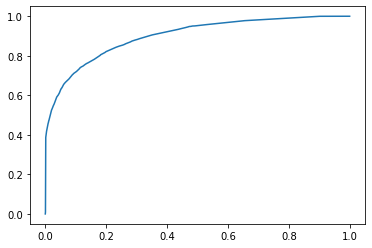

PR-AUC
PR-AUC: 0.8562283023867832


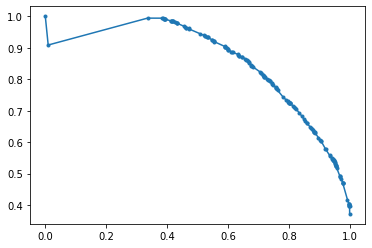

In [98]:
# Model 2
######################################################################
########### max depth and leaf nodes generated by GridSearchCV #######
model2 = DecisionTreeClassifier(criterion='gini',max_depth=19,max_leaf_nodes=200)
model2.fit(X_train,y_train)
treeObj2 = model2.tree_
print("number of nodes of model 2: " + str(treeObj2.node_count))
pred_test2 = model2.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test2,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test2))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test2))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = model2.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = model2.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

In [99]:
# model = DecisionTreeClassifier()

# CV
score_cv = cross_val_score(model,X_train,y_train,cv=10)

# Accuracy from cross validation
print('Average accuracy score is ' + str(score_cv.mean()))

# Grid Search CV
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,10)

# Set param_grid
try_grid = [{'max_depth':depths,'max_leaf_nodes':num_leafs}]
print(try_grid)

# Define model with GridSearch CV
DTM = GridSearchCV(DecisionTreeClassifier(),param_grid=try_grid,cv=10)

# Fit mode with training data
DTM.fit(X_train,y_train)

# Find best parameter
print('best parameters: '+str(DTM.best_params_))

# Find accuracy from best parameters
print('best accuracy score: ' + str(DTM.best_score_))

Average accuracy score is 0.8166514413162809
[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_leaf_nodes': [5, 10, 50, 100, 200]}]
best parameters: {'max_depth': 8, 'max_leaf_nodes': 100}
best accuracy score: 0.8168189240679642


# **Random Forest**

In [100]:
hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')
hotel.describe()

Unnamed: 0    is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean    59694.500000       0.370416       0.141128        2016.156554   
std     34465.068657       0.482918       0.144997           0.707476   
min         0.000000       0.000000       0.000000        2015.000000   
25%     29847.250000       0.000000       0.024423        2016.000000   
50%     59694.500000       0.000000       0.093623        2016.000000   
75%     89541.750000       1.000000       0.217096        2017.000000   
max    119389.000000       1.000000       1.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.048821              0.050006       0.033753   
std                   0.052559              0.038166       0.010532   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              0.020000       0.036364   
50%                   0.052632              0.040000       0.036364   
75%                   0.105263              0.060000       0.036364   
max                   1.000000              1.000000       1.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.010389       0.000795           0.031912   
std         0.039856       0.009744           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max         1.000000       1.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.003351                        0.001904   
std                  0.032474                        0.020798   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                  1.000000                        1.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.010530      86.693382   189.266735              0.005936   
std           0.031062     110.774548   131.655015              0.044999   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max           1.000000     535.000000   543.000000              1.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  \
count  119390.000000                119390.000000              119390.000000   
mean        0.020015                     0.007815                   0.571363   
std         0.009347                     0.030661                   0.792798   
min         0.000000                   

In [101]:
from sklearn.ensemble import RandomForestClassifier

hotel = pd.read_csv('Hotel_Bookings_Prepared.csv')

# one hot encoding
hotel = pd.get_dummies(hotel, columns=['is_holiday','is_diff_room_type','is_agent','is_company'])

# drop features
hotel = hotel.drop(['Unnamed: 0','arrival_date_year','arrival_date_day_of_month',\
                    'country', 'agent', 'company', 'reservation_status', 'reservation_status_date', 'hotel_encoded',\
                    'arrival_date_month_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded',\
                    'continent_encoded','arrival_date_day_of_the_week_encoded','arrival_date_week_number',\
                    'deposit_type_encoded','customer_type_encoded','reserved_room_type','assigned_room_type',\
                    'continent_Australia','deposit_type_Refundable','customer_type_Group','market_segment_Complementary',\
                    'distribution_channel_GDS','market_segment_Aviation','distribution_channel_Undefined',\
                    'market_segment_Undefined','continent_Antarctica','is_agent_True','is_diff_room_type_False',\
                    'is_holiday_False','is_company_False']
                    ,axis=1)

# assign features
features = hotel.columns[1:].tolist()
label = hotel.columns[:1].tolist()

X = hotel[features]
y = hotel[label]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# change target column to array
y_train = y_train.values.ravel()

#create a new random forest classifier
rf = RandomForestClassifier()

accuracy = cross_val_score (rf, X_train, y_train, cv=10).mean()


In [102]:
#create a dictionary of all values we want to test for n_estimators, number of trees
## define number to try out for max leaf nodes
num_leafs = [5,10,50,100,200]
depths = np.arange(1,21)

params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)


{'n_estimators': 200}


Accuracy 0.8637658095317866
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90     29989
           1       0.86      0.75      0.80     17767

    accuracy                           0.86     47756
   macro avg       0.86      0.84      0.85     47756
weighted avg       0.86      0.86      0.86     47756

Confusion Matrix 
 [[27852  2137]
 [ 4369 13398]]
ROC-AUC
AUC: 0.9311212576597686


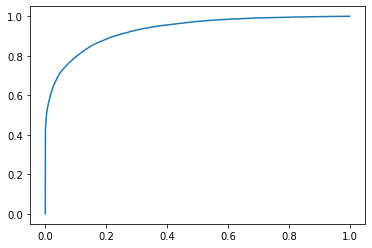

PR-AUC
PR-AUC: 0.9115258939533231


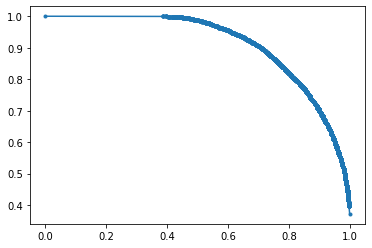

In [103]:
# create best model of random forest in term of number of trees (which is 200)
rf_best = RandomForestClassifier(n_estimators = 200)

# fit the random forest
rf_best.fit(X_train,y_train)

pred_test = rf_best.predict(X_test)

print("Accuracy",accuracy_score(y_test,pred_test,normalize=True,sample_weight=None))
print("Classification Report",'\n',classification_report(y_test,pred_test))
print("Confusion Matrix",'\n',confusion_matrix(y_test,pred_test))


########################################################################
####################### ROC-AUC ########################################
print('ROC-AUC')
predictions = rf_best.predict_proba(X_test)
fpr,tpr, _ = roc_curve(y_test, predictions[:,1])
print('AUC: '+ str(metrics.auc(fpr, tpr)))
plt.clf()
plt.plot(fpr,tpr)
plt.show()


########################################################################
####################### PR-AUC #########################################
print('PR-AUC')
yhat = rf_best.predict_proba(X_test)
pos_probs = yhat[:,1]
precision, recall, _ = precision_recall_curve(y_test,pos_probs)
auc_score = auc(recall,precision)
print('PR-AUC: ' + str(auc_score))
plt.plot(recall, precision, marker='.')
plt.show()

In [104]:
# Return the feature importances (the higher, the more important the feature)
feature_importances_ = pd.Series(rf_best.feature_importances_,index=features).sort_values(ascending=False)
# print(rf_best.feature_importances_)
feature_importances_

lead_time                                 0.157010
adr                                       0.116605
deposit_type_Non Refund                   0.082243
deposit_type_No Deposit                   0.078484
total_of_special_requests                 0.059896
stays_in_week_nights                      0.044543
previous_cancellations                    0.037364
is_diff_room_type_True                    0.030745
stays_in_weekend_nights                   0.026340
required_car_parking_spaces               0.021665
booking_changes                           0.020653
adults                                    0.018762
market_segment_Online TA                  0.017767
customer_type_Transient                   0.014888
customer_type_Transient-Party             0.012507
market_segment_Offline TA/TO              0.012354
market_segment_Groups                     0.011975
children                                  0.009324
arrival_date_day_of_the_week_Thursday     0.008627
arrival_date_day_of_the_week_Fr

In [105]:
print(rf_best.estimators_)

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=666883895, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2056449543, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='

### Neural Network